In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


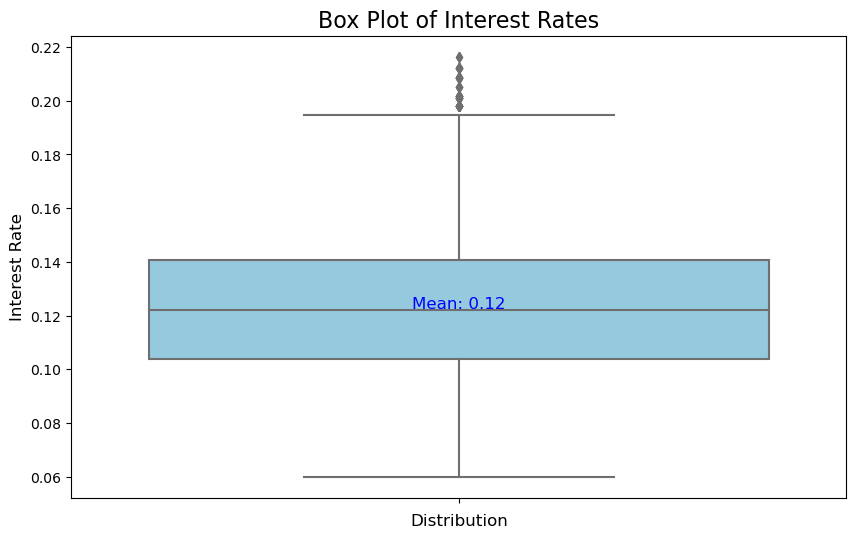

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(10, 6))
box = sns.boxplot(data=df, y='int.rate', color='skyblue')

# Add labels and title
plt.title('Box Plot of Interest Rates', fontsize=16)
plt.ylabel('Interest Rate', fontsize=12)
plt.xlabel('Distribution', fontsize=12)

# Calculate mean value
mean_value = df['int.rate'].mean()

# Annotate the mean value on the plot
plt.text(0, mean_value, f'Mean: {mean_value:.2f}', 
         horizontalalignment='center', color='blue', fontsize=12)

# Display the plot
plt.show()

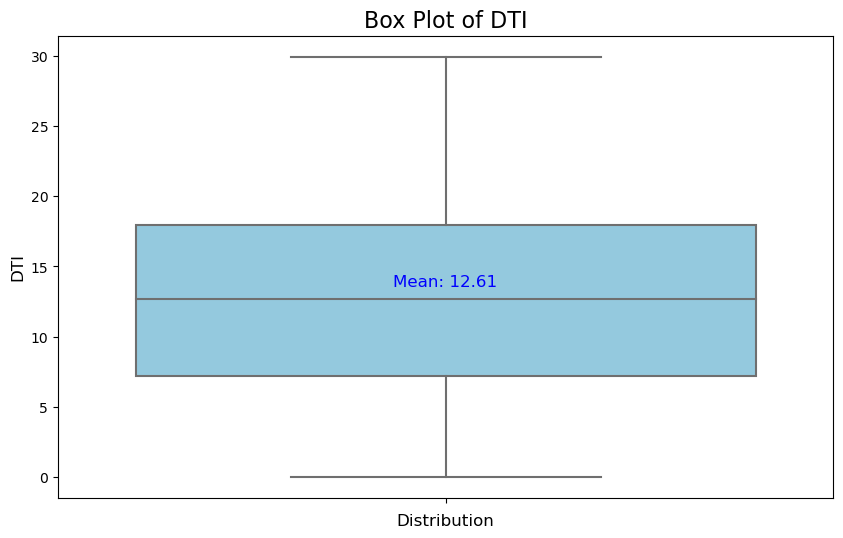

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot for DTI
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='dti', color='skyblue')

# Add labels and title
plt.title('Box Plot of DTI', fontsize=16)
plt.ylabel('DTI', fontsize=12)
plt.xlabel('Distribution', fontsize=12)

# Calculate the mean value of DTI
mean_value = df['dti'].mean()

# Annotate the mean value slightly above the line to avoid overlap
plt.text(0, mean_value + 1, f'Mean: {mean_value:.2f}', 
         horizontalalignment='center', color='blue', fontsize=12)

# Display the plot
plt.show()

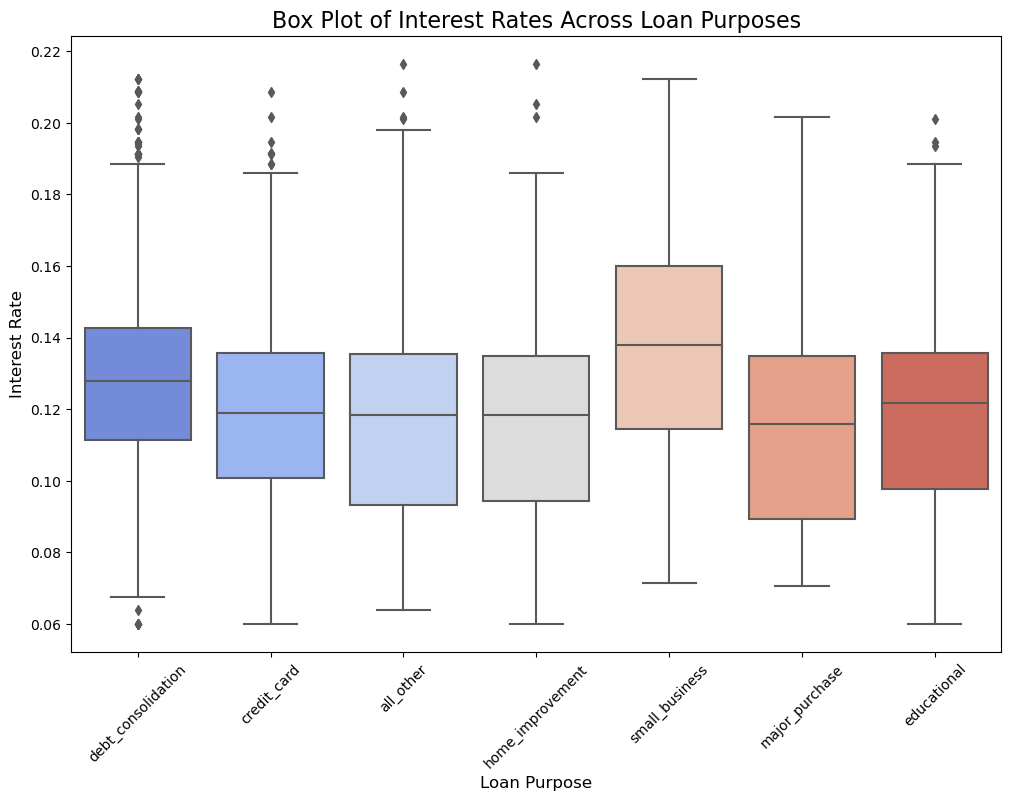

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='purpose', y='int.rate', palette='coolwarm')

# Add labels and title
plt.title('Box Plot of Interest Rates Across Loan Purposes', fontsize=16)
plt.ylabel('Interest Rate', fontsize=12)
plt.xlabel('Loan Purpose', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.show()

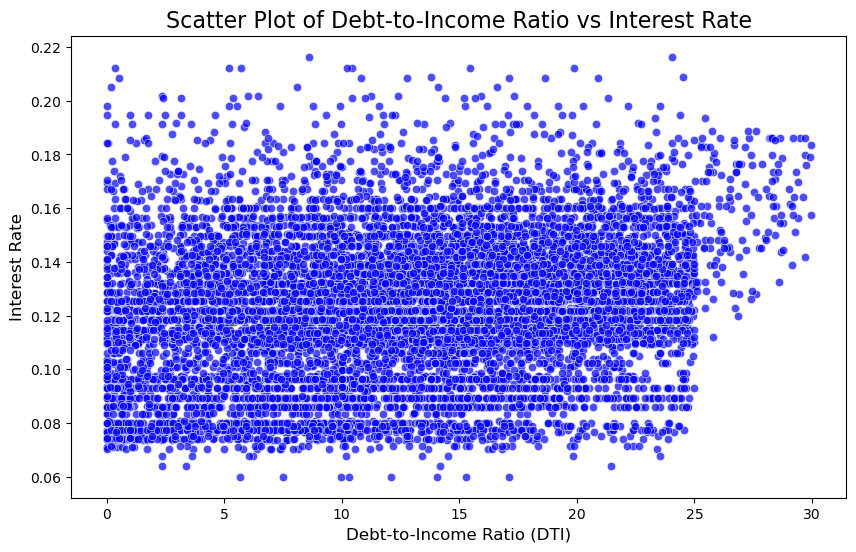

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dti', y='int.rate', alpha=0.7, color='blue')

# Add labels and title
plt.title('Scatter Plot of Debt-to-Income Ratio vs Interest Rate', fontsize=16)
plt.xlabel('Debt-to-Income Ratio (DTI)', fontsize=12)
plt.ylabel('Interest Rate', fontsize=12)

# Display the plot
plt.show()

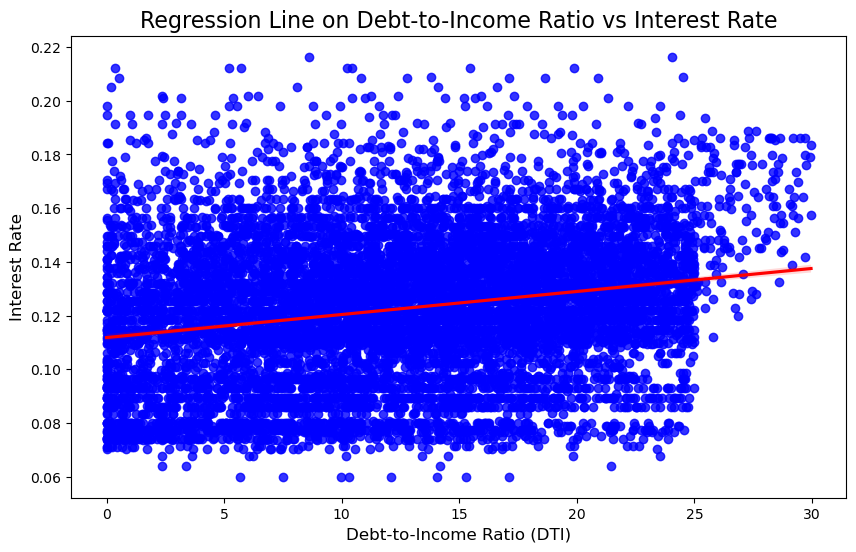

In [12]:
# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='dti', y='int.rate', color='blue', line_kws={'color': 'red'})

# Add labels and title
plt.title('Regression Line on Debt-to-Income Ratio vs Interest Rate', fontsize=16)
plt.xlabel('Debt-to-Income Ratio (DTI)', fontsize=12)
plt.ylabel('Interest Rate', fontsize=12)

# Display the plot
plt.show()

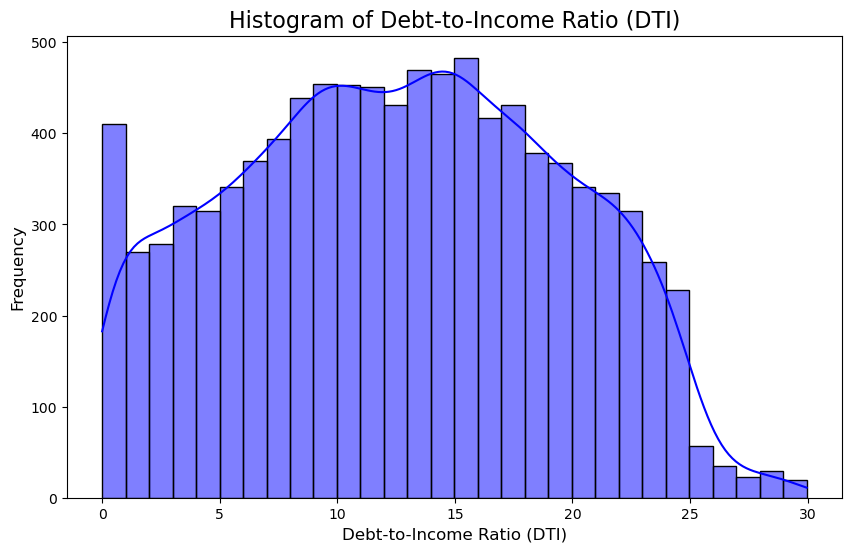

In [13]:
# Histogram for DTI
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='dti', kde=True, bins=30, color='blue')

# Add labels and title
plt.title('Histogram of Debt-to-Income Ratio (DTI)', fontsize=16)
plt.xlabel('Debt-to-Income Ratio (DTI)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

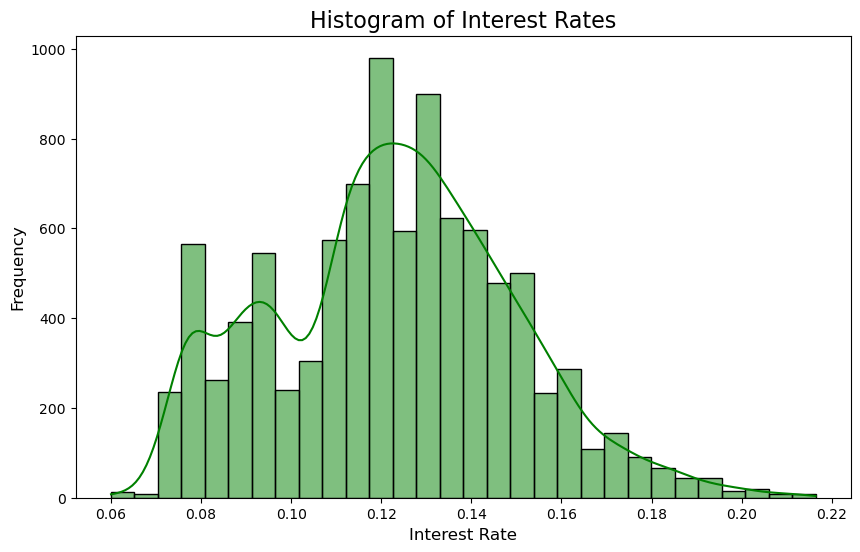

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='int.rate', kde=True, bins=30, color='green')

# Add labels and title
plt.title('Histogram of Interest Rates', fontsize=16)
plt.xlabel('Interest Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

In [15]:
X = df['dti']  # Independent variable (DTI)
X = sm.add_constant(X)  # Adds a constant term to the model

# Dependent variable (Interest Rate)
y = df['int.rate']

# Step 3: Fit the OLS model
model = sm.OLS(y, X)  # OLS model
results = model.fit()  # Fit the model

# Step 4: Display the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               int.rate   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     487.1
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          2.53e-105
Time:                        12:19:25   Log-Likelihood:                 21297.
No. Observations:                9578   AIC:                        -4.259e+04
Df Residuals:                    9576   BIC:                        -4.258e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1118      0.001    200.253      0.0

In [17]:
# Calculate the correlation matrix for the two variables
correlation = df[['dti', 'int.rate']].corr()

# Print the correlation value
print(correlation)

               dti  int.rate
dti       1.000000  0.220006
int.rate  0.220006  1.000000


C:\Users\shahd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


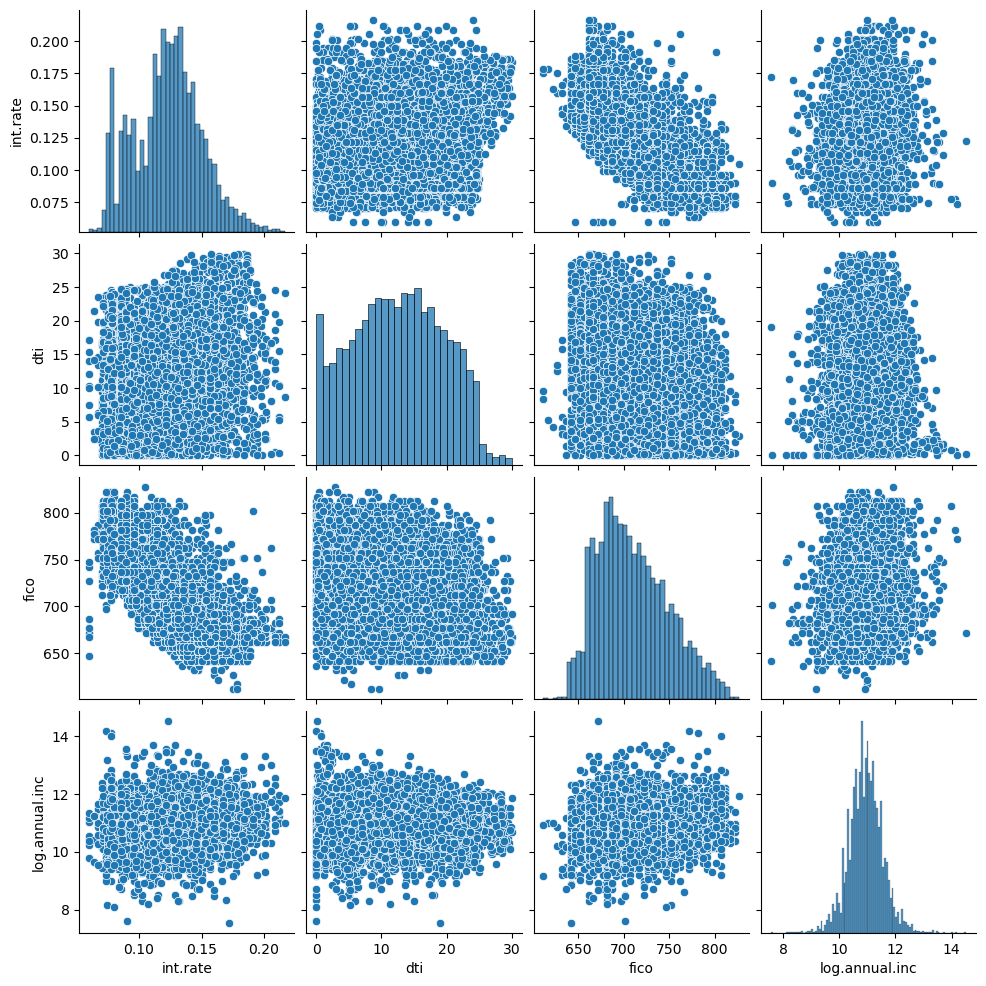

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df'
# You can select a subset of numerical columns for the pairplot if the dataset is large
# For example, let's use 'int.rate', 'dti', 'fico', and 'log.annual.inc' as our variables

# Select the relevant columns for the scatterplot matrix
columns_of_interest = ['int.rate', 'dti', 'fico', 'log.annual.inc']  # Add other columns as needed

# Create the pairplot
sns.pairplot(df[columns_of_interest])

# Show the plot
plt.show()

In [19]:
# Perform one-hot encoding on the 'purpose' column
df_encoded = pd.get_dummies(df, columns=['purpose'], prefix='purpose', drop_first=True)

# Ensure the dummy variables are numeric (convert from bool to int)
dummy_columns = [col for col in df_encoded.columns if col.startswith('purpose_')]
df_encoded[dummy_columns] = df_encoded[dummy_columns].astype(int)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [20]:
# Define the dependent variable (Y) and independent variables (X)
y = df_encoded['int.rate']  # Dependent variable
X = df_encoded.drop(columns=['int.rate'])  # All other variables as predictors

# Add a constant to the predictors (for the intercept term)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               int.rate   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1038.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:20:31   Log-Likelihood:                 26249.
No. Observations:                9578   AIC:                        -5.246e+04
Df Residuals:                    9559   BIC:                        -5.232e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

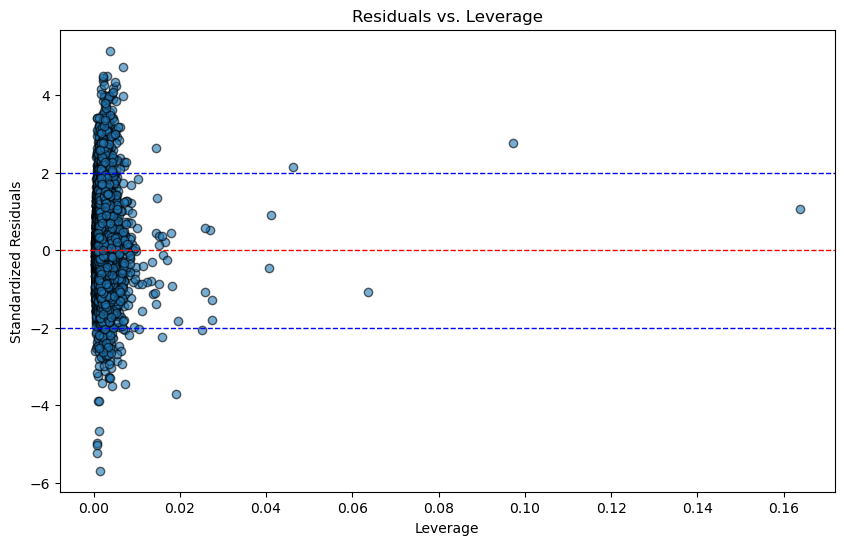

Updated Model Summary After Removing Influential Points:
                            OLS Regression Results                            
Dep. Variable:               int.rate   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1479.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:22:13   Log-Likelihood:                 25244.
No. Observations:                8475   AIC:                        -5.045e+04
Df Residuals:                    8456   BIC:                        -5.032e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [21]:
# Step 1: Calculate diagnostic measures
influence = model.get_influence()  # Get influence measures
leverage = influence.hat_matrix_diag  # Leverage values
cooks_d = influence.cooks_distance[0]  # Cook's Distance
standardized_residuals = influence.resid_studentized_internal  # Standardized residuals
 
# Step 2: Plot leverage vs. residuals (Residuals vs. Leverage plot)
plt.figure(figsize=(10, 6))
plt.scatter(leverage, standardized_residuals, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=2, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=-2, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs. Leverage')
plt.show()
 
# Step 3: Identify points with high leverage
high_leverage_threshold = 2 * (X.shape[1] / X.shape[0])  # Common threshold: 2*(p/n)
high_leverage_points = np.where(leverage > high_leverage_threshold)[0]
 
# Step 4: Identify points with large Cook's Distance
cooks_threshold = 4 / len(y)  # Common threshold for Cook's Distance
high_cooks_points = np.where(cooks_d > cooks_threshold)[0]
 
# Step 5: Remove influential points (if needed)
# Combine high-leverage and high Cook's Distance points
influential_points = set(high_leverage_points).union(set(high_cooks_points))
 
# Remove influential points and refit the model
df_cleaned = df_encoded.drop(index=influential_points)
X_cleaned = sm.add_constant(df_cleaned.drop(columns=['int.rate']))
y_cleaned = df_cleaned['int.rate']
 
# Refit the model without influential points
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()
 
# Display the updated model summary
print("Updated Model Summary After Removing Influential Points:")
print(model_cleaned.summary())

In [22]:
import statsmodels.stats.api as sms

# Perform Breusch-Pagan test for heteroscedasticity
test_results = sms.het_breuschpagan(model_cleaned.resid, model_cleaned.model.exog)

# The test returns four values: Lagrange Multiplier statistic, p-value, f-value, and f p-value.
# The second value (p-value) is used to check for heteroscedasticity.
bp_p_value = test_results[1]

print(f'Breusch-Pagan test p-value: {bp_p_value}')

# If p-value < 0.05, there is evidence of heteroscedasticity

Breusch-Pagan test p-value: 2.1085496355315136e-87


In [23]:
# Fit the OLS model with robust standard errors (HC3)
ols_model_robust_cleaned = sm.OLS(y_cleaned, X_cleaned).fit(cov_type='HC3')

# Print the summary of the model with robust standard errors
print(ols_model_robust_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:               int.rate   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1452.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:23:22   Log-Likelihood:                 25244.
No. Observations:                8475   AIC:                        -5.045e+04
Df Residuals:                    8456   BIC:                        -5.032e+04
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif = pd.DataFrame()
vif['Variable'] = X_cleaned.columns
vif['VIF'] = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]

# Display VIF values
print(vif)

                      Variable          VIF
0                        const  1360.005725
1                credit.policy     1.663637
2                  installment     1.386053
3               log.annual.inc     1.654447
4                          dti     1.256015
5                         fico     2.118507
6            days.with.cr.line     1.336434
7                    revol.bal     1.559409
8                   revol.util     1.873049
9               inq.last.6mths     1.505473
10                 delinq.2yrs     1.129694
11                     pub.rec     1.050957
12              not.fully.paid     1.057947
13         purpose_credit_card     1.414258
14  purpose_debt_consolidation     1.737612
15         purpose_educational     1.056969
16    purpose_home_improvement     1.203018
17      purpose_major_purchase     1.118119
18      purpose_small_business     1.166769


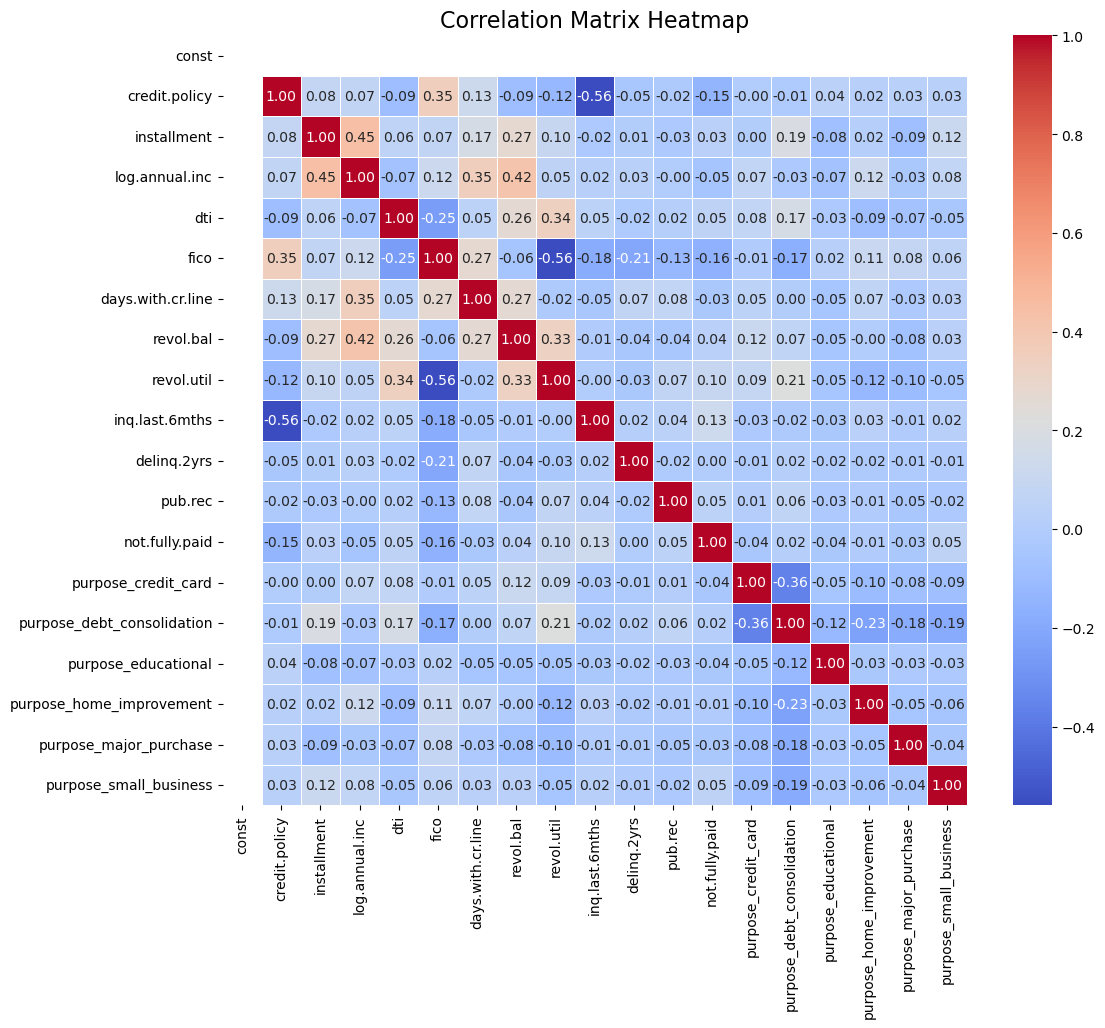

In [25]:
# Compute the correlation matrix
corr_matrix = X_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [26]:
# Define the dependent variable (Y) and independent variables (X)
y = df_cleaned['int.rate']  # Dependent variable
X = df_cleaned.drop(columns=['int.rate','installment','revol.util','inq.last.6mths'])  # All other variables as predictors

# Add a constant to the predictors (for the intercept term)
X = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Print the summary of the model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               int.rate   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1083.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:26:13   Log-Likelihood:                 23755.
No. Observations:                8475   AIC:                        -4.748e+04
Df Residuals:                    8459   BIC:                        -4.737e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               